**Visualization**

In [18]:
# Import the necessary libraries for text analysis and visualization
import pandas as pd
from collections import Counter
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
# Import the necessary library for mounting Google Drive
from google.colab import drive

# Mount the Google Drive to access files in Google Drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Read the CSV file containing the lyrics DataFrame from the mounted Google Drive
df = pd.read_csv("/content/gdrive/MyDrive/Data/lyrics.csv")

# Drop any rows containing missing values and reset the DataFrame index
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)

# Download the NLTK stopwords corpus for English and assign to a variable
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
# Download the WordNet and Open Multilingual WordNet (OMW) corpora using NLTK
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [5]:
def count_words(df):
    # Create a Counter object to keep track of word frequencies
    word_count = Counter()
    
    # Iterate through each row in the DataFrame
    for index, row in df.iterrows():
        # Convert all lyrics to lowercase
        lyrics = row["lyrics"].lower() 
        # Split the lyrics into individual words
        words = lyrics.split() 
        # Remove any non-alphabetic characters
        words = [w for w in words if w.isalpha()] 
        # Remove any stop words
        words = [w for w in words if w not in stop_words]
        # Perform stemming on each word
        words = [nltk.PorterStemmer().stem(w) for w in words]
        # Update the Counter object with the stemmed words
        word_count.update(words) 
        
    # Return the final Counter object containing the word frequencies
    return word_count

In [6]:
# Use the count_words function to generate a Counter object with word frequencies
word_count = count_words(df)

# Iterate through a list of potentially sensitive words
for word in ['nigga', 'bitch', 'fuck']:
    # If the word is in the Counter object
    if word in word_count:
        # Replace the word in the Counter object with a censored version
        word_count[word.replace(word, word[0] + '*'*(len(word)-2) + word[-1])] = word_count.pop(word)

# Print the number of unique words in the Counter object and the 25 most common words
print(len(word_count))
print(word_count.most_common(25))

13057
[('like', 2138), ('got', 1824), ('get', 1494), ('n***a', 1351), ('know', 1348), ('f**k', 925), ('b***h', 889), ('go', 756), ('want', 717), ('make', 691), ('love', 663), ('yeah', 642), ('shit', 621), ('back', 575), ('might', 569), ('see', 552), ('one', 517), ('need', 498), ('say', 496), ('wanna', 493), ('never', 447), ('take', 431), ('babi', 411), ('also', 400), ('la', 399)]


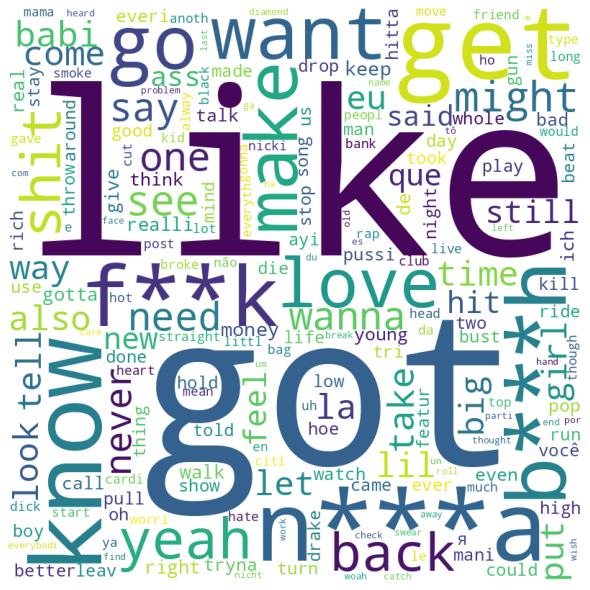

In [7]:
# Create a WordCloud object with the word frequencies generated by the count_words function
wordcloud = WordCloud(width=800, height=800,
                background_color='white',
                min_font_size=10).generate_from_frequencies(word_count)

# Create a plot of the WordCloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

The larger and bolder the word appears in the cloud, the more frequently it appears in the lyrics. This visualization can give a quick sense of the words that are most commonly used.

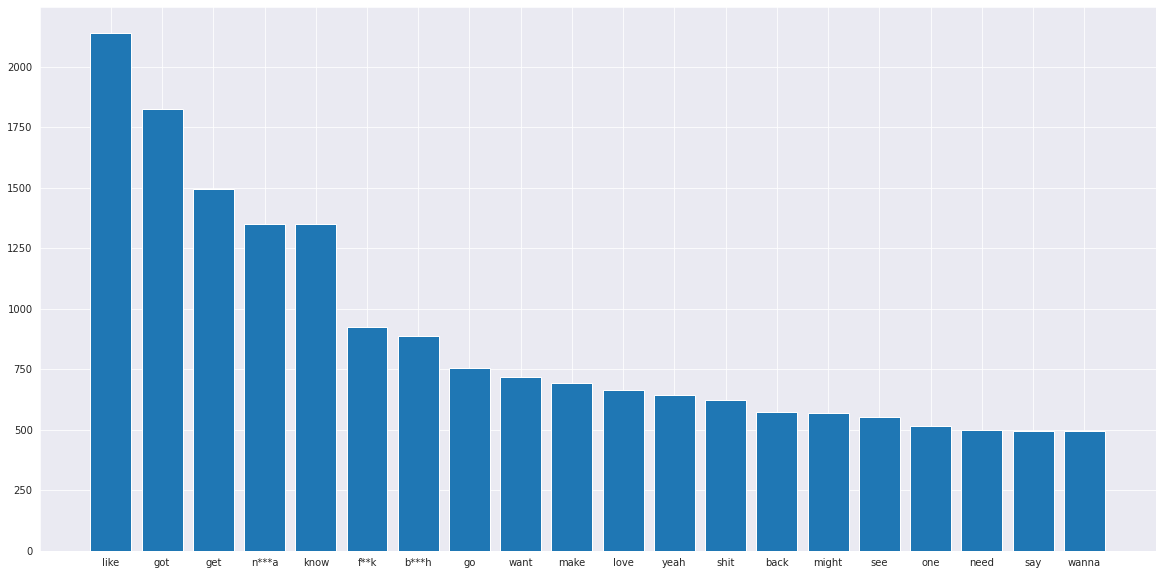

In [8]:
# Import seaborn for plotting style
import seaborn as sns

# Set seaborn style to darkgrid
sns.set_style("darkgrid")

# Create a bar plot of the 20 most common words
plt.figure(figsize=(20,10))
plt.bar(*zip(*word_count.most_common(20)))
plt.show()

In [9]:
corpus = []  # Initialize empty list for preprocessed lyrics

for index, row in df.iterrows():  # Loop through each row in the dataframe
    lyrics = row["lyrics"].lower()  # Get the lyrics from the current row and convert to lowercase
    words = lyrics.split()  # Split the lyrics into individual words
    words = [w for w in words if w.isalpha()]  # Remove any non-alphabetic characters
    words = [w for w in words if w not in stop_words]  # Remove stopwords
    words = [nltk.WordNetLemmatizer().lemmatize(w) for w in words]  # Lemmatize the remaining words
    corpus.append(" ".join(words))  # Join the preprocessed words back into a string and append to the corpus list

In [10]:
#initialize a TfidfVectorizer object
tfidf = TfidfVectorizer()

In [11]:
# Define a TfidfVectorizer object with default settings
tfidf = TfidfVectorizer()

# Calculate the TF-IDF matrix for the given corpus
tfidf_matrix = tfidf.fit_transform(corpus)

# Get the feature names of the TF-IDF matrix
features = tfidf.get_feature_names_out()

# Print the list of feature names
print(features)

['aah' 'aalegra' 'aaron' ... '허리' '헉소리나게' '화끈해야']


In [12]:
# Iterate through each row of the TF-IDF matrix
for i in range(tfidf_matrix.shape[0]):
    
    # Get the indices that would sort the i-th row in descending order
    sorted_indices = tfidf_matrix[i].toarray()[0].argsort()[::-1]
    
    # Print the title of the i-th document
    print(f"{df['title'][i]}:")
    
    # Print the top 5 features and their corresponding TF-IDF scores for the i-th document
    for j in sorted_indices[:5]:
        print(f"    {features[j]}: {tfidf_matrix[i, j]}")

Can't Hold Us:
    feat: 0.2575353956604439
    die: 0.1687848176373522
    michael: 0.14007047595824185
    ich: 0.13960572122359682
    der: 0.13707953640411746
Holy Grail:
    rocawear: 0.56874621444822
    august: 0.2846627863091976
    draya: 0.22749848577928802
    preview: 0.21643405675141633
    jay: 0.21387782796352256
F**kin Problems:
    problem: 0.482648732192933
    bad: 0.30642896116231916
    like: 0.27475120671242304
    love: 0.2656900160938313
    solve: 0.23964097976770396
Love Me:
    lil: 0.2921334622093557
    song: 0.2365838914577031
    woman: 0.22642051422546738
    wayne: 0.17482317389962834
    trying: 0.1516409677038902
Power Trip:
    night: 0.5042519061360832
    song: 0.48857059158212784
    got: 0.3354353373518163
    love: 0.27344080456441
    constant: 0.22812611486747955
I Cry:
    letting: 0.5713035502733022
    riddle: 0.3118115439500921
    flo: 0.2857247928705661
    little: 0.28322774765636527
    think: 0.23892508809694224
Berzerk:
    kick: 0.2

In [13]:
#create a graph for the top tf-idf words for each song
fig = go.Figure()

for i in range(tfidf_matrix.shape[0]):
    sorted_indices = tfidf_matrix[i].toarray()[0].argsort()[::-1]
    
    # get the top 5 tf-idf words for each song
    top_words = [features[j] for j in sorted_indices[:1]]
    top_tfidf = [tfidf_matrix[i, j] for j in sorted_indices[:1]]
    
    # add a bar chart for each song
    fig.add_trace(go.Bar(x=top_words, y=top_tfidf, name=df['title'][i]))

# update the layout of the graph
fig.update_layout(title='Top Words for Each Song', xaxis_title='Words', yaxis_title='TF-IDF', barmode='stack')

# display the graph
fig.show()

The presented visualization provides a granular analysis of the most significant words in each song, enabling a more in-depth understanding of the lyrics. By hovering over the bars, the song title in which the word was prominently featured can be viewed. This highlights that the most frequently used word in a song may not necessarily hold the highest significance for the overall meaning of the song.

In [15]:
# Extract the song lyrics and year columns from the original DataFrame
song_lyrics = df.iloc[:, 3]
year = df.iloc[:, 2]

# Create a new DataFrame with the song lyrics and year columns
new_df = pd.DataFrame({"lyrics": song_lyrics, "year": year})

# Drop any rows with missing values (i.e., NaN values)
new_df.dropna(inplace=True)

In [17]:
# Create a new column in the DataFrame that counts the number of words in each song's lyrics
new_df['word_count'] = new_df['lyrics'].str.split().str.len()

# Group the DataFrame by year and calculate the average word count for each year
avg_word_count = new_df.groupby('year')['word_count'].mean()

# Print a message and display the resulting Series object containing the average word counts
print("Average word count of songs per year")
avg_word_count

Average word count of songs per year


year
2013    871.450000
2014    650.424242
2015    604.088235
2016    644.292683
2017    625.325000
2018    656.263158
2019    590.146341
2020    601.891304
2021    791.106383
2022    737.458333
Name: word_count, dtype: float64

The decreasing length of lyrics over the years suggests a shift towards simpler and more straightforward lyrics. 